# Assignment 4: Clustering Methods

## Questions

In [41]:
import pandas as pd

fileURL = 'https://raw.githubusercontent.com/cse44648/cse44648/master/datasets/us-crime.csv'
raw_data = pd.read_csv(fileURL)

raw_data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


### 1. Partitional Clustering (15 points) 
Using Scikit-learn, perform *k*-means clustering on the US Crime data (using k=8). How well do the clusters separate the data? Look at the values of the features at the cluster centers. What do you observe that could characterize and differentiate each cluster?

_Sample code:_ `pd.DataFrame(clustering.cluster_centers_, columns=data.columns).T` 

/opt/homebrew/Caskroom/miniforge/base/envs/CSE_60647/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


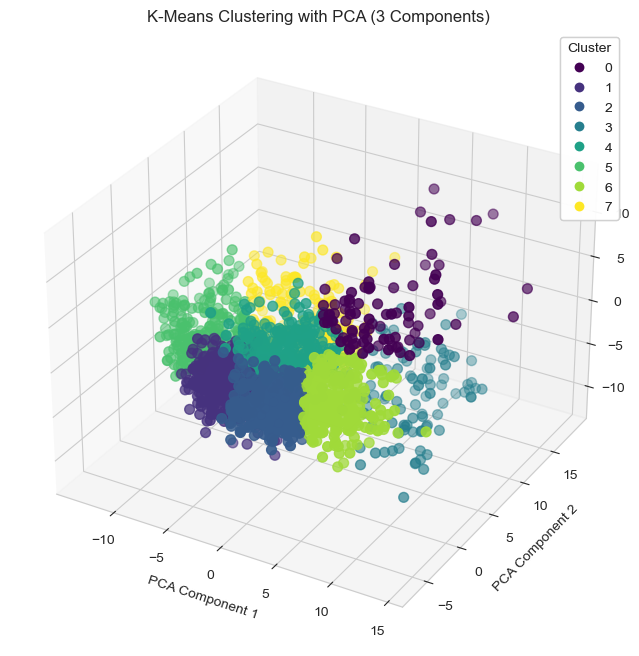

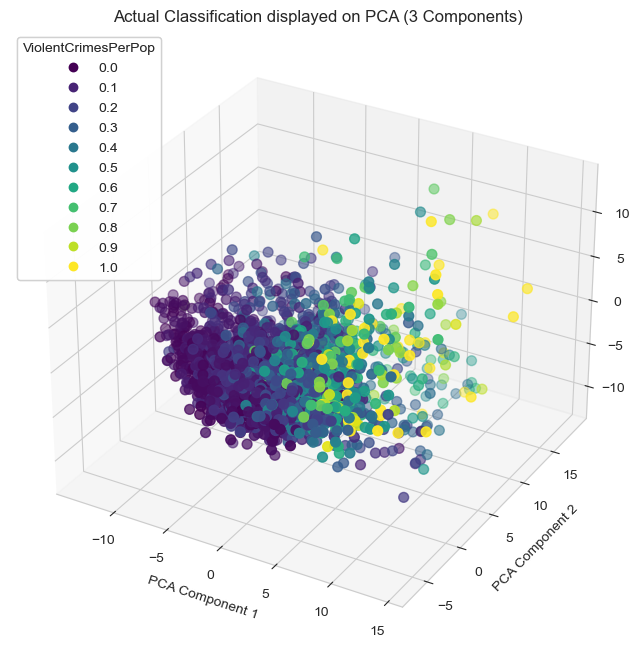


Cluster centers in the original feature space:
      state      fold  population  householdsize  racepctblack  racePctWhite  \
0 -0.581474 -0.056648    1.635974      -0.845398      1.189351     -1.331793   
1  0.189525  0.026731   -0.560046       0.133317     -0.509337      0.643684   
2  0.374271 -0.030053   -0.290510      -0.393822      0.152690      0.245416   
3 -0.569225  0.014697    0.238061       2.291634      0.257987     -1.757590   
4 -0.111859 -0.010703    0.375297      -0.399121      0.219129     -0.130953   
5 -0.218036  0.070722   -0.229932       0.176771     -0.846995      0.760902   
6  0.201152 -0.053948    0.140599      -0.224606      0.619001     -0.484104   
7 -0.642650  0.041994    0.608110       0.544009     -0.129445     -0.511466   

   racePctAsian  racePctHisp  agePct12t21  agePct12t29  ...  NumStreet  \
0      0.701620     0.410937     0.213845     0.933296  ...   1.340438   
1     -0.189916    -0.358648    -0.205929    -0.431353  ...  -0.465408   
2     -0.

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats

#############DATA PREPROCESSING############
#Don't use categorical variables : CommunityName --> As these cannot be used in kmeans: Decided against re-encoding to simplify things
data = raw_data.select_dtypes(include=['float64', 'int64'])
#Determine number of NAN values -- Commented out
# print(data.shape)
# print(data.isnull().sum())

#Given the amount of empty values for the various columns is above 50% of the dataset (1994*0.5 = 997), I have decided to drop the columns instead of just dropping the individual entry values, to allow for the analysis of all the other data values
data = data.dropna(axis='columns')

features = data.columns[:-1]  # Exclude the 'Cluster' column

#Selecting Features
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Perform PCA to be able to visualize clustering
pca = PCA(n_components=3, svd_solver='randomized').fit(X)
X = pca.transform(X)


##########K - MEANS CLUSTERING############
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
clusters = kmeans.predict(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
data['Cluster'] = clusters



#Display Clustering vs Original Results on PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis', s=50)
legend = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend)
ax.set_title('K-Means Clustering with PCA (3 Components)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y, cmap='viridis', s=50)
legend = ax.legend(*scatter.legend_elements(), title="ViolentCrimesPerPop")
ax.add_artist(legend)
ax.set_title('Actual Classification displayed on PCA (3 Components)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()


#Obtain values of centroids from PCA
# Transform the cluster centers back to the original feature space
cluster_centers_original = pca.inverse_transform(centroids)

# Print cluster centers in the original feature space
print("\nCluster centers in the original feature space:")
print(pd.DataFrame(cluster_centers_original, columns=features))

#Perform ANOVA Test to avoid comparing pairwise clusters
import pandas as pd
from scipy.stats import f_oneway

# Assuming df is your DataFrame and labels is the cluster labels
anova_results = {}
for feature in data.columns[:-1]:  # Exclude the 'Cluster' column
    f_val, p_val = stats.f_oneway(*[data[data['Cluster'] == cluster][feature] for cluster in range(n_clusters)])
    anova_results[feature] = p_val

# Print features with significant differences across clusters (p-value < 0.05)
print("\nFeatures with significant differences across clusters (p-value < 0.05):")
significant_features = {feature: p_val for feature, p_val in anova_results.items() if p_val < 0.05}
print(significant_features)
print(len(significant_features.keys()))

Overall the clusters are able to create a decent seperation of the different groups, with many of the individual clusters being able to mirror the expected target variable of ViolentCrimesPerPop, especially for the values of  ViolentCrimesPerPop > 0.8 mirroring the structure of clusters 6 and 3. 
As for which of the features are significant I decide to perform an ANOVA test instead of a pairwise t-test (Which would need to compare each pairwise feature of each cluster which would be cumbersome), however, we can immediately tell that all features are measured to be statistically significant, meaning that all of these populations have inherently diverse characteristics which seperate them from one another. 

#### 2. Hierarchical Clustering (15 points)
Using either sklearn or scipy, perform agglomerative clustering on the US Crime data and restrict the clustering to 8 clusters. How well do the clusters separate the data? Using scipy, create a dendogram of the clusters. (Dendograms are easier in scipy than sklearn)


Mean feature values for each cluster:
             state      fold  population  householdsize  racepctblack  \
Cluster                                                                 
0        27.807175  5.179372    0.203722       0.410538      0.279596   
1        33.887879  5.557576    0.020091       0.460273      0.123152   
2        32.805869  5.440181    0.020271       0.474176      0.060971   
3        19.218182  5.418182    0.094909       0.765364      0.196182   
4        26.401130  5.717514    0.022881       0.516893      0.043333   
5        11.705263  5.442105    0.101474       0.525053      0.134105   
6        30.189840  5.368984    0.049037       0.388529      0.425428   
7        25.157025  5.880165    0.046818       0.411736      0.111901   

         racePctWhite  racePctAsian  racePctHisp  agePct12t21  agePct12t29  \
Cluster                                                                      
0            0.656368      0.191749     0.168610     0.522018     0.643004

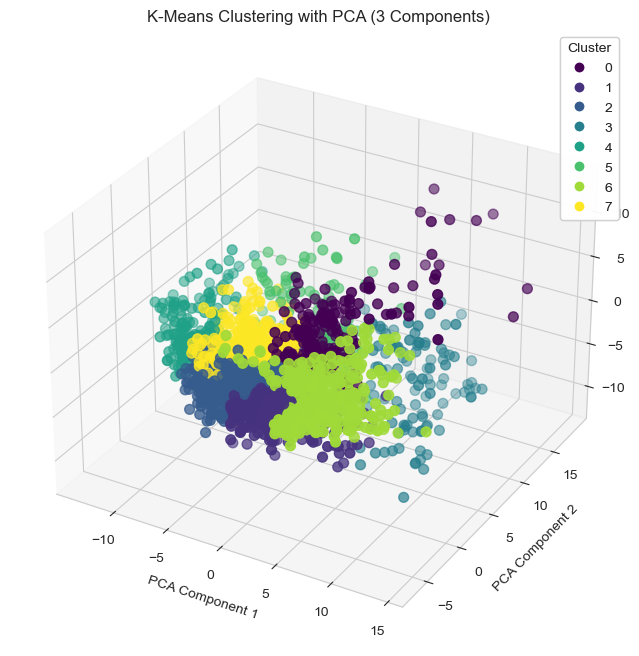

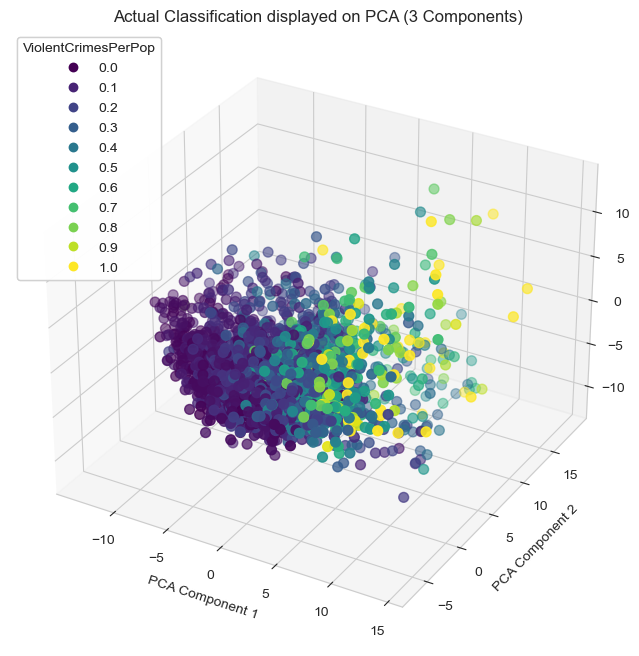

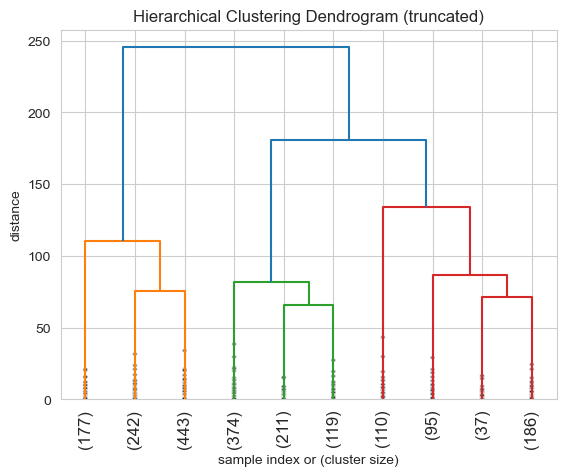

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

#############DATA PREPROCESSING############
#Don't use categorical variables : CommunityName --> As these cannot be used in kmeans: Decided against re-encoding to simplify things
data = raw_data.select_dtypes(include=['float64', 'int64'])
#Determine number of NAN values -- Commented out
# print(data.shape)
# print(data.isnull().sum())

#Given the amount of empty values for the various columns is above 50% of the dataset (1994*0.5 = 997), I have decided to drop the columns instead of just dropping the individual entry values, to allow for the analysis of all the other data values
data = data.dropna(axis='columns')

features = data.columns[:-1]  # Exclude the 'Cluster' column

#Selecting Features
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Perform PCA to be able to visualize clustering in 3 dimensions
pca = PCA(n_components=3, svd_solver='randomized').fit(X)
X = pca.transform(X)

# Apply Agglomerative Clustering
n_clusters = 8  # Number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agg_clustering.fit_predict(X)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Print the mean feature values for each cluster
cluster_means = data.groupby('Cluster').mean()
print("\nMean feature values for each cluster:")
print(cluster_means)


#Display Clustering vs Original Results on PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clusters, cmap='viridis', s=50)
legend = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend)
ax.set_title('K-Means Clustering with PCA (3 Components)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y, cmap='viridis', s=50)
legend = ax.legend(*scatter.legend_elements(), title="ViolentCrimesPerPop")
ax.add_artist(legend)
ax.set_title('Actual Classification displayed on PCA (3 Components)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()



# Create a dendrogram
Z = linkage(X, 'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()



Overall we can note that the clustering using hierarchical clustering does better capture the expected target variable of ViolentCrimesPerPop, as we have aggregated all of these values into a single cluster 3 for the vast majority of cases. Overall we can note thatthe dendogram separates the clusters into well organized classes.



#### 3. Comparison (5 points, plus up to 2 points extra credit for thorough answers) 
How does *k*-means clustering compare with hierarchical clustering?

Add comments here